In [11]:
import pandas as pd

In [12]:
index = ['Siamese', 'DeBERTa', 'Combined', 'Majority/Random']
df = pd.DataFrame(columns=['Easy', 'Medium', 'Hard'], index=index)

In [13]:
df['Easy']['Siamese'] = 0.90287
df['Easy']['DeBERTa'] = 0.97019
df['Easy']['Combined'] = 0.96760
df['Easy']['Majority/Random'] = 0.84977

df['Medium']['Siamese'] = 0.70984
df['Medium']['DeBERTa'] = 0.83728
df['Medium']['Combined'] = 0.83660
df['Medium']['Majority/Random'] = 0.50414

df['Hard']['Siamese'] = 0.53545
df['Hard']['DeBERTa'] = 0.72800
df['Hard']['Combined'] = 0.72828
df['Hard']['Majority/Random'] = 0.49816

In [14]:
df

,Easy,Medium,Hard
Siamese,0.90287,0.70984,0.53545
DeBERTa,0.97019,0.83728,0.728
Combined,0.9676,0.8366,0.72828
Majority/Random,0.84977,0.50414,0.49816


C:\Users\aless\AppData\Local\Temp\ipykernel_7792\3699791768.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('bone')


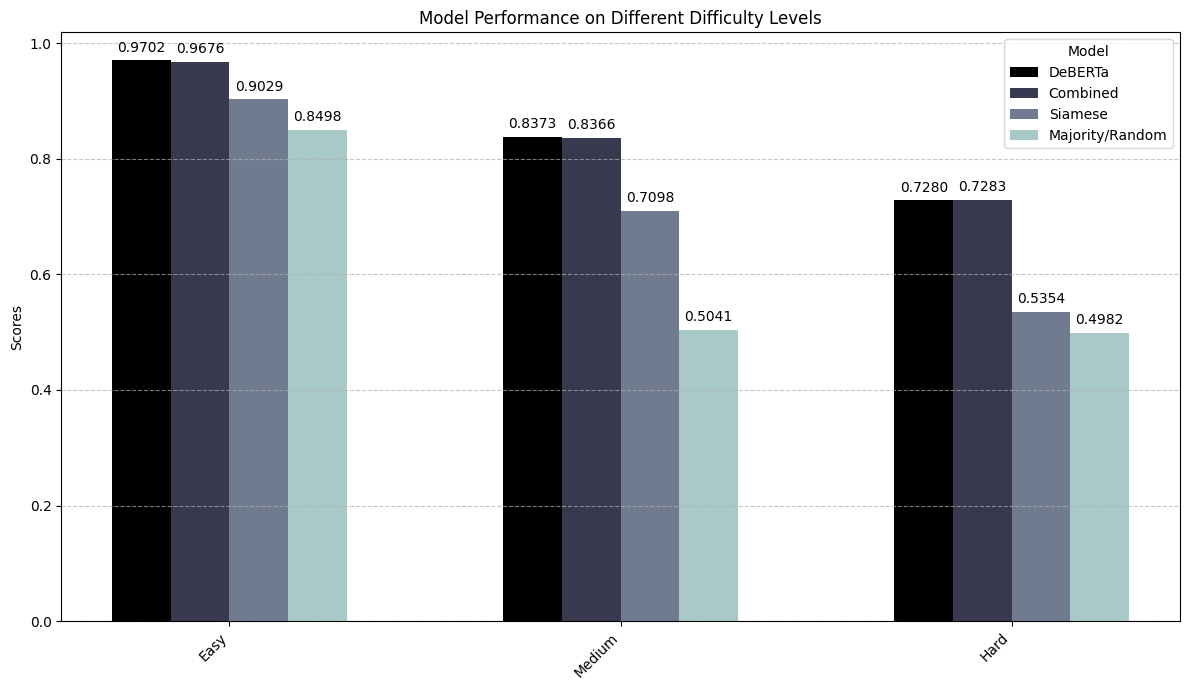

In [15]:
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.colors import Normalize
import numpy as np

# Assuming df is your DataFrame
df_sorted = df.sort_values(by='Medium', ascending=False)

difficulty_levels = df_sorted.columns
models = df_sorted.index
x = np.arange(len(difficulty_levels))  # the label locations
width = 0.15  # the width of the bars

# Define a colormap
colormap = cm.get_cmap('bone')
normalize = Normalize(vmin=0, vmax=len(models))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Plotting the bars
for i, model in enumerate(models):
    color = colormap(normalize(i))
    ax.bar(x + i * width, df_sorted.loc[model], width, label=model, color=color)

# Set the y axis label
ax.set_ylabel('Scores')

# Set the chart's title
ax.set_title('Model Performance on Different Difficulty Levels')

# Set the position of the x ticks
ax.set_xticks(x + width * (len(models) - 1) / 2)

# Set the labels for the x ticks
ax.set_xticklabels(difficulty_levels, rotation=45, ha='right')

# Adding the legend
ax.legend(title='Model')

# Adding the grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations
for i, model in enumerate(models):
    for j, value in enumerate(df_sorted.loc[model]):
        ax.text(x[j] + i * width, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.savefig('f1-plot.png')
